# Storytelling With Data: Graphs
## Airline Safety

## Packages

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np
import squarify
from datetime import datetime

## Prep Data

In [2]:
air = pd.read_csv('airline-safety.csv')

In [3]:
air.head()

,airline,avail_seat_km_per_week,incidents_85_99,fatal_accidents_85_99,fatalities_85_99,incidents_00_14,fatal_accidents_00_14,fatalities_00_14
0,Aer Lingus,320906734,2,0,0,0,0,0
1,Aeroflot*,1197672318,76,14,128,6,1,88
2,Aerolineas Argentinas,385803648,6,0,0,1,0,0
3,Aeromexico*,596871813,3,1,64,5,0,0
4,Air Canada,1865253802,2,0,0,2,0,0


In [4]:
# create columns for incidents without fatal accidents
air["incident_without_fatal_85_99"] = air["incidents_85_99"] - air["fatal_accidents_85_99"]
air["incident_without_fatal_00_14"] = air["incidents_00_14"] - air["fatal_accidents_00_14"]

In [5]:
# create columns for deaths per available seats 
air["death_per_avail_seat_85_99"] = air["fatalities_85_99"] / air["avail_seat_km_per_week"]
air["death_per_avail_seat_00_14"] = air["fatalities_00_14"] / air["avail_seat_km_per_week"]

In [6]:
# seat per billion
air['seat_per_billion'] = air['avail_seat_km_per_week']/1000000000

In [7]:
# incidents per billion
air['incident_per_bill_85_99'] = air['incidents_85_99'] / air['seat_per_billion']
air['incident_per_bill_00_14'] = air['incidents_00_14'] / air['seat_per_billion']

In [8]:
# Year column
air["85-99"] = "1985-1999"
air["00-14"] = "2000-2014"

In [9]:
# incidents per seat
air['incident_per_seat_85_99'] = air['incidents_85_99'] / air['avail_seat_km_per_week']
air['incident_per_seat_00_14'] = air['incidents_00_14'] / air['avail_seat_km_per_week']

In [10]:
# deaths per billion
air['deaths_per_bill_85_99'] = air['fatalities_85_99'] / air['seat_per_billion']
air['deaths_per_bill_00_14'] = air['fatalities_00_14'] / air['seat_per_billion']

## Total Airline Incidents

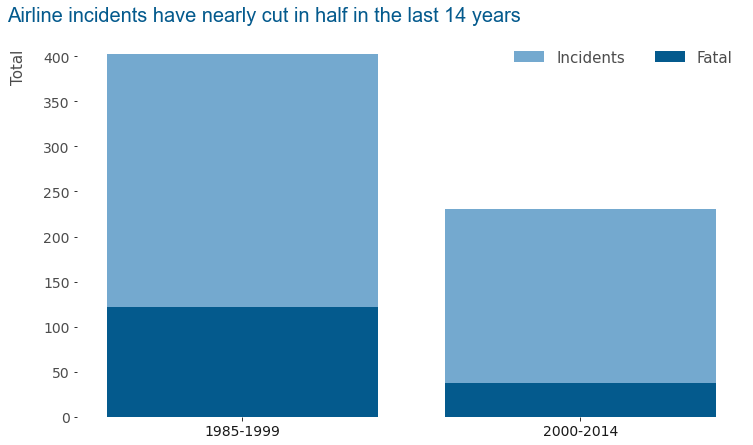

In [11]:
# set default font color
mpl.rcParams['text.color'] = '#4c4c4c'

font = {'family': 'Arial',
       'color': '#045a8d',
       'size': 20}

# setup 85-99 data
fatal_85_99 = np.sum(air['fatal_accidents_85_99'])
incident_85_99 = np.sum(air['incidents_85_99'])
years_85_99 = air['85-99']

# setup 00-14 data
fatal_00_14 = np.sum(air['fatal_accidents_00_14'])
incident_00_14 = np.sum(air['incidents_00_14'])
years_00_14 = air['00-14']

# create figure
fig, ax = plt.subplots(figsize = (12,7))

# add bars
ax.bar(years_85_99, incident_85_99, color = "#74a9cf", label='Incidents')
ax.bar(years_85_99, fatal_85_99, color = "#045a8d", label='Fatal')

ax.bar(years_00_14, incident_00_14, color = "#74a9cf")
ax.bar(years_00_14, fatal_00_14, color = "#045a8d")


# horizontal grid
ax.yaxis.grid(False)

# vertical grid
ax.xaxis.grid(False)

# set labels
ax.set_title('Airline incidents have nearly cut in half in the last 14 years', 
             x = -.1, pad = 15, fontdict=font)
#ax.set_xlabel('', fontsize = 13)
ax.set_ylabel('Total', fontsize = 15, color='#4c4c4c')

# set axis label positions
ax.yaxis.set_label_coords(-.075,.92)
ax.title.set_position([.28, .99])

# ticks
plt.xticks(fontsize=14, horizontalalignment='center', color='#191919')
plt.yticks(fontsize=14, color='#4c4c4c')

# legend
ax.legend(ncol = 2, loc = 'upper right', prop={'size':15}).draw_frame(False)

# remove spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)


plt.savefig('stacked_incidents.svg', format='svg', dpi=300, bbox_inches='tight')

plt.show()

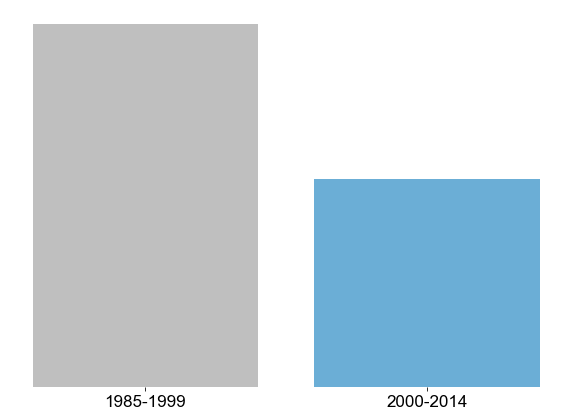

In [12]:
font = {'family': 'Arial',
       'color': '#1c1c1c',
       'size': 20}

incident_85_99 = np.sum(air['incidents_85_99'])
years_85_99 = air['85-99']

incident_00_14 = np.sum(air['incidents_00_14'])
years_00_14 = air['00-14']

# create figure
fig, ax = plt.subplots(figsize = (10,7))

# add bars
ax.bar(years_85_99, incident_85_99, color = "#bfbfbf", label='Incidents')


ax.bar(years_00_14, incident_00_14, color = "#6baed6")



# horizontal grid
ax.yaxis.grid(False)

# vertical grid
ax.xaxis.grid(False)

#ax.set_title('Airline incidents cut in half', 
             #fontdict=font,
             #pad = 15)
#ax.set_xlabel('Years', fontsize = 13)
#ax.set_ylabel('Total', fontsize = 15)

# remove y axis ticks
ax.axes.yaxis.set_ticks([])

# set axis label positions
#ax.yaxis.set_label_coords(-.06,.51)
#ax.xaxis.set_label_coords(.26, -.08)
ax.title.set_position([.255, 0])

# tick size
plt.xticks(fontsize = 17, fontname = "Arial")
#plt.yticks(fontsize = 14)

# remove spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.savefig('air_incidents_info.svg', format='svg', dpi=300, bbox_inches='tight')

plt.show()

## Airline Fatal Accidents

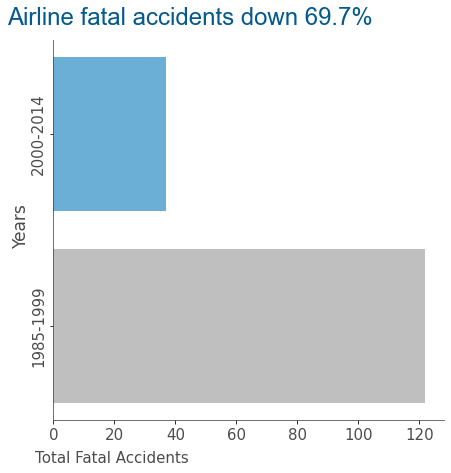

In [13]:
font = {'family': 'Arial',
       'color': '#045a8d',
       'size': 24}

# set up data
fatal_accidents_85 = np.sum(air['fatal_accidents_85_99'])
fatal_accidents_00 = np.sum(air['fatal_accidents_00_14'])
years_85_99 = air['85-99']
years_00_14 = air['00-14']

# create figure
fig, ax = plt.subplots(figsize = (7,7))

# add bars
ax.barh(years_85_99, fatal_accidents_85, color = "#bfbfbf")
ax.barh(years_00_14, fatal_accidents_00, color = "#6baed6")

# labels
ax.set_title('Airline fatal accidents down 69.7%', fontdict=font, pad=15)
ax.set_xlabel('Total Fatal Accidents', fontsize = 15, color='#4c4c4c')
ax.set_ylabel('Years', fontsize = 17, color='#4c4c4c')

# set axis label positions
ax.yaxis.set_label_coords(-.06,.51)
ax.xaxis.set_label_coords(.15, -.08)
ax.title.set_position([.35, 0])

# horizontal grid
ax.yaxis.grid(False)

# vertical grid
ax.xaxis.grid(False)

# remove y axis ticks
#ax.axes.yaxis.set_ticks([])

# configure ticks
plt.yticks(fontsize = 15, rotation=90, va='center', color='#4c4c4c')
plt.xticks(fontsize = 15, color='#4c4c4c')

#ax.legend(ncol = 2, loc = 'upper right', prop={'size':15}).draw_frame(False)

# remove spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)

# spine color
ax.spines['left'].set_color('#4c4c4c')
ax.spines['bottom'].set_color('#4c4c4c')

# tick line color
for t in ax.xaxis.get_ticklines(): t.set_color('#4c4c4c')
for t in ax.yaxis.get_ticklines(): t.set_color('#4c4c4c')

plt.savefig('fatal_bar_h.svg', format='svg', dpi=300, bbox_inches='tight')

plt.show()

## Top Airlines with Incidents

In [14]:
# incidents 2000-2014
# sort data decreasing incident value
sort_incident_00 = air.sort_values('incident_per_bill_00_14', ascending=False)

In [15]:
sort_incident_00.head()

,airline,avail_seat_km_per_week,incidents_85_99,fatal_accidents_85_99,fatalities_85_99,incidents_00_14,fatal_accidents_00_14,fatalities_00_14,incident_without_fatal_85_99,incident_without_fatal_00_14,...,death_per_avail_seat_00_14,seat_per_billion,incident_per_bill_85_99,incident_per_bill_00_14,85-99,00-14,incident_per_seat_85_99,incident_per_seat_00_14,deaths_per_bill_85_99,deaths_per_bill_00_14
35,Pakistan International,348563137,8,3,234,10,2,46,5,8,...,1.319704e-07,0.348563,22.951366,28.689207,1985-1999,2000-2014,2.295137e-08,2.868921e-08,671.327444,131.970352
40,Saudi Arabian,859673901,7,2,313,11,0,0,5,11,...,0.000000e+00,0.859674,8.142622,12.795550,1985-1999,2000-2014,8.142622e-09,1.279555e-08,364.091546,0.000000
44,Sri Lankan / AirLanka,325582976,2,1,14,4,0,0,1,4,...,0.000000e+00,0.325583,6.142827,12.285655,1985-1999,2000-2014,6.142827e-09,1.228565e-08,42.999791,0.000000
22,Ethiopian Airlines,488560643,25,5,167,5,2,92,20,3,...,1.883083e-07,0.488561,51.170720,10.234144,1985-1999,2000-2014,5.117072e-08,1.023414e-08,341.820411,188.308251
38,Royal Air Maroc,295705339,5,3,51,3,0,0,2,3,...,0.000000e+00,0.295705,16.908724,10.145234,1985-1999,2000-2014,1.690872e-08,1.014523e-08,172.468986,0.000000


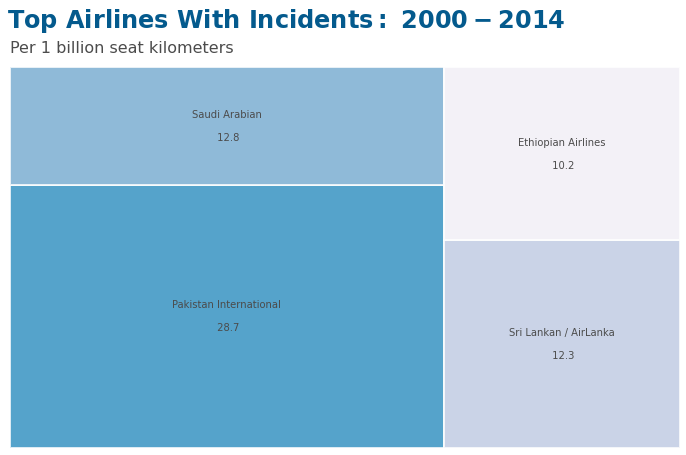

In [16]:
color = ['#2b8cbe', '#74a9cf', '#bdc9e1', '#f1eef6']

font = {'family': 'Arial',
       'color': '#045a8d',
       'size': 12}

labels = sort_incident_00.apply(lambda x: str(x['airline']) + '\n \n ' + str(np.round(x['incident_per_bill_00_14'],1)), axis=1)

fig, ax = plt.subplots(1, figsize = (12,7))
squarify.plot(sizes = sort_incident_00['incident_per_bill_00_14'][:4],
              label= labels, alpha = .8,
             color = color,
             bar_kwargs=dict(linewidth=2, edgecolor='#ffffff'))
plt.rc('font', size=20)

plt.suptitle('$\\bf{Top\ Airlines\ With\ Incidents:\ 2000-2014}$', x = .445, y = 1, fontdict=font)
ax.set_title('Per 1 billion seat kilometers', fontsize = 16, pad = 15, loc = "left")

plt.axis('off')

plt.savefig('3rd_world_14.svg', format='svg', dpi=300, bbox_inches='tight')
plt.show()

## Incident per avail seat

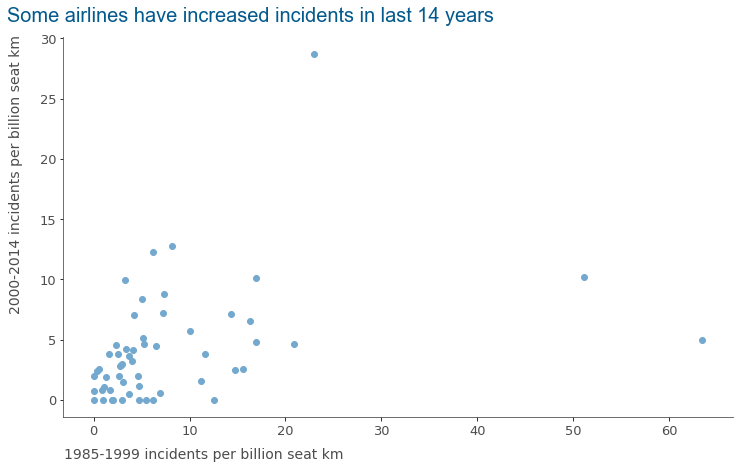

In [17]:
font = {'family': 'Arial',
       'color': '#045a8d',
       'size': 20}


incident_seat85 = air['incident_per_bill_85_99']
incident_seat00 = air['incident_per_bill_00_14']

fig, ax = plt.subplots(figsize = (12,7))

ax.scatter(incident_seat85, incident_seat00, color='#74a9cf')

# change y axis starting point
#ax.set_ylim(440,)

# grid
ax.xaxis.grid(False)
ax.yaxis.grid(False)

# set labels
ax.set_title('Some airlines have increased incidents in last 14 years', 
             x = -.14, pad = 15, fontdict=font)
ax.set_xlabel('1985-1999 incidents per billion seat km', fontsize = 14, color='#4c4c4c')
ax.set_ylabel('2000-2014 incidents per billion seat km', fontsize = 14, color='#4c4c4c')

# set axis label positions
ax.yaxis.set_label_coords(-.06,.64)
ax.xaxis.set_label_coords(.21, -.08)
ax.title.set_position([.28, 1.03])

# legend and ticks
plt.xticks(fontsize=13, horizontalalignment='center', color='#4c4c4c')
plt.yticks(fontsize=13, color='#4c4c4c')

# remove spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)

# spine color
ax.spines['left'].set_color('#4c4c4c')
ax.spines['bottom'].set_color('#4c4c4c')

# tick line color
for t in ax.xaxis.get_ticklines(): t.set_color('#4c4c4c')
for t in ax.yaxis.get_ticklines(): t.set_color('#4c4c4c')

# add comma to y axis tick values
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

# export
plt.savefig('scatter_increase_incidents.svg', format='svg', dpi=300, bbox_inches='tight')

plt.show()

## Deaths per avail seat

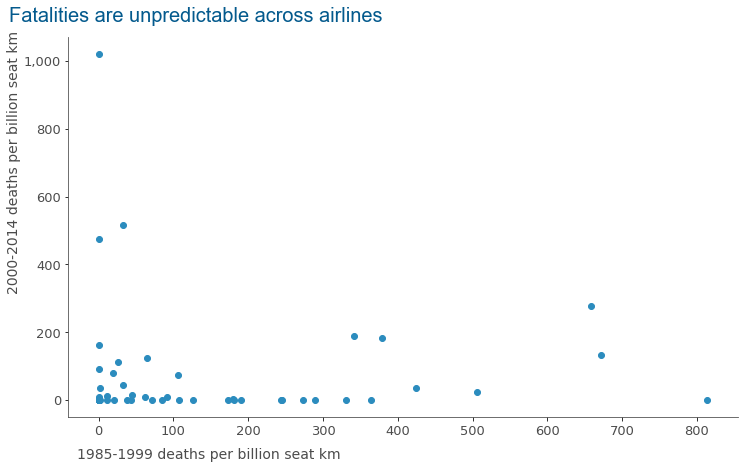

In [18]:
font = {'family': 'Arial',
       'color': '#045a8d',
       'size': 20}


deaths_seat85 = air['deaths_per_bill_85_99']
deaths_seat00 = air['deaths_per_bill_00_14']

fig, ax = plt.subplots(figsize = (12,7))

ax.scatter(deaths_seat85, deaths_seat00, color='#2b8cbe')

# change y axis starting point
#ax.set_ylim(440,)

# grid
ax.xaxis.grid(False)
ax.yaxis.grid(False)

# set labels
ax.set_title('Fatalities are unpredictable across airlines', 
             pad = 15, fontdict=font)
ax.set_xlabel('1985-1999 deaths per billion seat km', fontsize = 14, color='#4c4c4c')
ax.set_ylabel('2000-2014 deaths per billion seat km', fontsize = 14, color='#4c4c4c')

# set axis label positions
ax.yaxis.set_label_coords(-.07,.67)
ax.xaxis.set_label_coords(.21, -.08)
ax.title.set_position([.19, 1.03])

# legend and ticks
plt.xticks(fontsize=13, horizontalalignment='center', color='#4c4c4c')
plt.yticks(fontsize=13, color='#4c4c4c')

# remove spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)

# spine color
ax.spines['left'].set_color('#4c4c4c')
ax.spines['bottom'].set_color('#4c4c4c')

# tick line color
for t in ax.xaxis.get_ticklines(): t.set_color('#4c4c4c')
for t in ax.yaxis.get_ticklines(): t.set_color('#4c4c4c')

# add comma to y axis tick values
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

# export
plt.savefig('scatter_deaths_unpredictable.svg', format='svg', dpi=300, bbox_inches='tight')

plt.show()

# Airline Revenue Data

In [19]:
revenue = pd.read_excel('airline_revenue.xlsx')

In [20]:
revenue.head()

,Year,Month,DOMESTIC,INTERNATIONAL,TOTAL
0,2002,10,39181901,31535229,70717130
1,2002,11,36462419,28497161,64959580
2,2002,12,41534214,31761398,73295612
3,2002,TOTAL,471652206,380094028,851746234
4,2003,1,36358651,31073669,67432321


In [21]:
# divide by 1 million
revenue['Domestic_mil'] = revenue['DOMESTIC']/1000000
revenue['International_mil'] = revenue['INTERNATIONAL']/1000000

In [22]:
# filter out months to receive only yearly totals
revenue_total = revenue[revenue['Month'] == 'TOTAL']

# filter year until 2014
revenue_total = revenue_total[revenue_total['Year']<=2014]
revenue_total.head()

,Year,Month,DOMESTIC,INTERNATIONAL,TOTAL,Domestic_mil,International_mil
3,2002,TOTAL,471652206,380094028,851746234,471.652206,380.094028
16,2003,TOTAL,494172457,370074101,864246558,494.172457,370.074101
29,2004,TOTAL,544573171,421210122,965783293,544.573171,421.210122
42,2005,TOTAL,570854623,451385768,1022240392,570.854623,451.385768
55,2006,TOTAL,576445444,472005316,1048450760,576.445444,472.005316


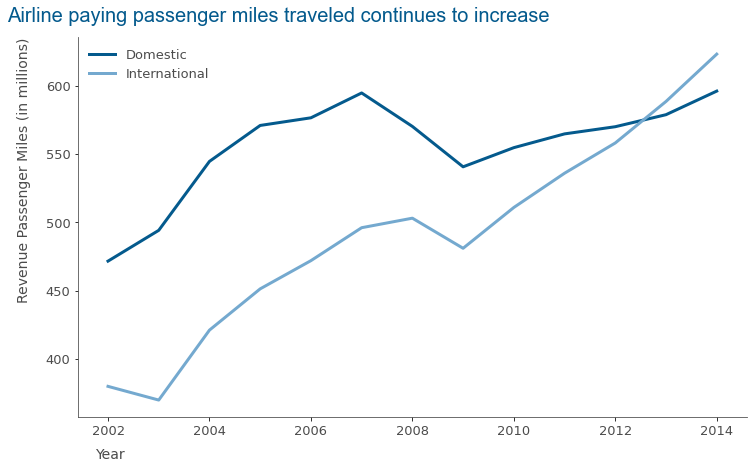

In [23]:
font = {'family': 'Arial',
       'color': '#045a8d',
       'size': 20}

year = revenue_total['Year']
domestic = revenue_total['Domestic_mil']
international = revenue_total['International_mil']

fig, ax = plt.subplots(figsize = (12,7))

ax.plot(year, domestic, linewidth = 3.0, label='Domestic', color='#045a8d')
ax.plot(year, international, linewidth = 3.0, label='International', color='#74a9cf')

# change y axis starting point
#ax.set_ylim(440,)

# grid
ax.xaxis.grid(False)
ax.yaxis.grid(False)

# set labels
ax.set_title("Airline paying passenger miles traveled continues to increase", 
             x = -.14, pad = 15, fontdict=font)
ax.set_xlabel('Year', fontsize = 14, color='#4c4c4c')
ax.set_ylabel('Revenue Passenger Miles (in millions)', fontsize = 14, color='#4c4c4c')

# set axis label positions
ax.yaxis.set_label_coords(-.07,.65)
ax.xaxis.set_label_coords(.05, -.08)
ax.title.set_position([.3, 1.03])

# legend and ticks
ax.legend(fontsize=13, ncol=1, loc='upper left', frameon=False)
plt.xticks(fontsize=13, horizontalalignment='center', color='#4c4c4c')
plt.yticks(fontsize=13, color='#4c4c4c')

# remove spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)

# spine color
ax.spines['left'].set_color('#4c4c4c')
ax.spines['bottom'].set_color('#4c4c4c')

# tick line color
for t in ax.xaxis.get_ticklines(): t.set_color('#4c4c4c')
for t in ax.yaxis.get_ticklines(): t.set_color('#4c4c4c')

# add comma to y axis tick values
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

# export
plt.savefig('line_revenue.svg', format='svg', dpi=300, bbox_inches='tight')

plt.show()

# Airline Load Factor Data

In [24]:
# US airlines
load = pd.read_excel('load_factor.xlsx')

In [25]:
load.head()

,Year,Month,DOMESTIC,INTERNATIONAL,TOTAL
0,2002,10,67.93,72.60,69.08
1,2002,11,66.68,69.92,67.46
2,2002,12,72.93,74.53,73.31
3,2002,TOTAL,70.42,76.00,71.78
4,2003,1,64.44,71.71,66.20


In [26]:
# filter by total for year
load_totals = load[load['Month']=='TOTAL']

# filter years before 2015
load_totals = load_totals[load_totals['Year']<=2014]

# create % unfilled
load_totals['Unfilled_total'] = 100-load_totals['DOMESTIC']

In [27]:
load_totals.tail()

,Year,Month,DOMESTIC,INTERNATIONAL,TOTAL,Unfilled_total
107,2010,TOTAL,82.21,81.74,82.07,17.79
120,2011,TOTAL,82.88,80.35,82.10,17.12
133,2012,TOTAL,83.38,81.52,82.80,16.62
146,2013,TOTAL,83.48,82.36,83.13,16.52
159,2014,TOTAL,84.51,81.06,83.43,15.49


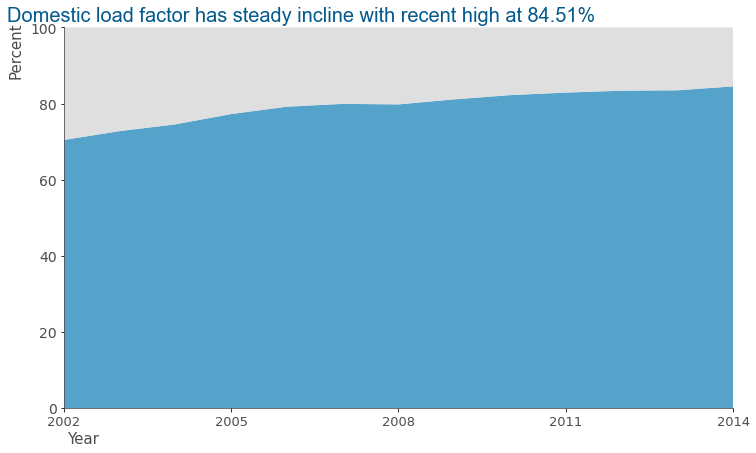

In [28]:
font = {'family': 'Arial',
       'color': '#045a8d',
       'size': 20}

# prep data
x = load_totals['Year'].values.tolist()
y1 = load_totals['DOMESTIC'].values.tolist()
y2 = load_totals['Unfilled_total'].values.tolist()
y = np.vstack([y1, y2])
labs = ['Load Factor', 'Unfilled']

colors = ['#2b8cbe', '#d8d8d8']
columns = ['Domestic', 'International']

# draw plot
fig, ax = plt.subplots(figsize = (12,7))
ax = plt.gca()
ax.stackplot(x, y, labels=labs, colors=colors, alpha=0.8)

# change y axis starting point
ax.set_ylim(0,100)

# set labels
ax.set_title('Domestic load factor has steady incline with recent high at 84.51%', fontdict=font)
ax.set_ylabel('Percent', fontsize=15, color='#4c4c4c')
ax.set_xlabel('Year', fontsize=15, color = '#4c4c4c')

# set axis label positions
ax.yaxis.set_label_coords(-.06,.94)
ax.xaxis.set_label_coords(.03, -.06)
ax.title.set_position([.355, 1.03])

# legend and ticks
#ax.legend(fontsize=13, ncol=1, loc='upper left', frameon=False)
plt.xticks(x[::3], fontsize=13, horizontalalignment='center', color='#4c4c4c')
plt.yticks(fontsize=14, color='#4c4c4c')

plt.margins(0,0)

# remove spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)

# spine color
ax.spines['left'].set_color('#4c4c4c')
ax.spines['bottom'].set_color('#4c4c4c')

# tick line color
for t in ax.xaxis.get_ticklines(): t.set_color('#4c4c4c')
for t in ax.yaxis.get_ticklines(): t.set_color('#4c4c4c')

plt.savefig('stacked_load_factor.svg', format='svg', dpi=300, bbox_inches='tight')
plt.show()

# Car Crash Data

###  Car Fatal Crashes

In [29]:
car_fatal = pd.read_excel('CarFatal.xlsx')

In [30]:
car_fatal = car_fatal[car_fatal['Crash Date (Year)']!='Total']

In [31]:
car_fatal.tail(2)

,Crash Date (Year),January,February,March,April,May,June,July,August,September,October,November,December,Total
9,2013,2230,1952,2356,2300,2532,2692,2660,2899,2741,2768,2615,2457,30202
10,2014,2168,1893,2245,2308,2596,2583,2696,2800,2618,2831,2714,2604,30056


### Car Injury Crashes

In [32]:
car_injury = pd.read_excel('CarInjury.xlsx')

In [33]:
car_injury = car_injury[car_injury['Crash Date (Year)']!='Total']

In [34]:
car_injury.tail(2)

,Crash Date (Year),January,February,March,April,May,June,July,August,September,October,November,December,Total
9,2013,113869,108691,126013,130749,136085,136404,133793,137460,131935,145528,151010,139479,1591016
10,2014,129948,122053,127331,132330,141117,134636,129001,147014,147449,155099,133030,148718,1647726


### Car Property Damage

In [35]:
car_property = pd.read_excel('CarProperty.xlsx')

In [36]:
car_property = car_property[car_property['Crash Date (Year)']!='Total']

In [37]:
car_property.tail(2)

,Crash Date (Year),January,February,March,April,May,June,July,August,September,October,November,December,Total
9,2013,342798,331849,328900,307505,331728,305832,309210,323153,322878,379012,387868,394940,4065673
10,2014,450065,365468,365898,316521,339989,322971,329126,324752,341346,403247,430477,396643,4386502


## Fatal Car Crashes

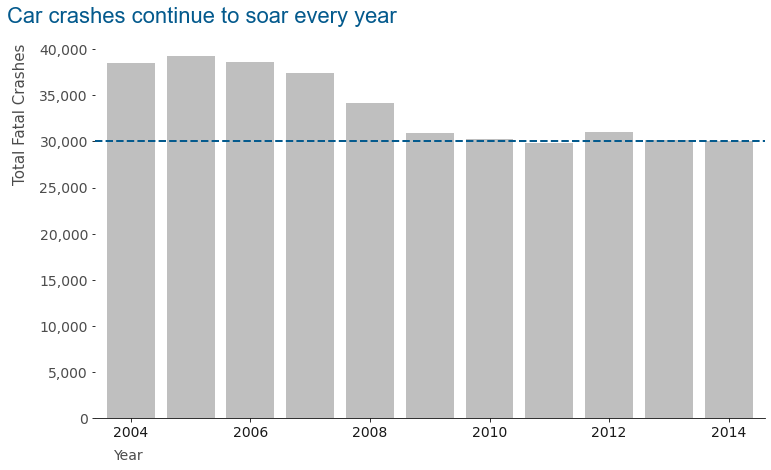

In [38]:
# set default font color
mpl.rcParams['text.color'] = '#4c4c4c'

font = {'family': 'Arial',
       'color': '#045a8d',
       'size': 22}


year = car_fatal['Crash Date (Year)']
fatal_crashes = car_fatal['Total']

# create figure
fig, ax = plt.subplots(figsize = (12,7))

# add bars
ax.bar(year, fatal_crashes, color = "#bfbfbf", label='Fatal')

# change axis starting point
#ax.set_ylim(0,)
ax.set_xlim(2003.4, 2014.6)

# horizontal grid
ax.yaxis.grid(False)

# vertical grid
ax.xaxis.grid(False)

# set labels
ax.set_title('Car crashes continue to soar every year', 
             x = -.1, pad = 15, fontdict=font)
ax.set_ylabel('Total Fatal Crashes', fontsize = 15, color='#4c4c4c')
ax.set_xlabel('Year', fontsize = 14, color='#4c4c4c')

# set axis label positions
ax.xaxis.set_label_coords(.05, -.08)
ax.yaxis.set_label_coords(-.1,.8)
ax.title.set_position([.16, .99])

# ticks
plt.xticks(fontsize=14, horizontalalignment='center', color='#191919')
plt.yticks(fontsize=14, color='#4c4c4c')

# add comma to y axis tick values
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

# legend
#ax.legend(ncol = 2, loc = 'upper right', prop={'size':15}).draw_frame(False)

# remove spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(True)

# plot line
plt.axhline(linewidth=2, color='#045a8d', linestyle = '--', y=30000)

plt.savefig('fatal_car_bar.svg', format='svg', dpi=300, bbox_inches='tight')

plt.show()

## Airline Passenger Data

In [39]:
air_pass = pd.read_csv('airline_passengers.csv')

In [40]:
# filter only yearly totals
air_pass = air_pass[air_pass['Month']=='TOTAL']

In [41]:
# filter out years before 2015
air_pass = air_pass[air_pass['Year']<=2014]

In [42]:
air_pass['TOTAL'] = air_pass['TOTAL'].astype('str')
air_pass['DOMESTIC'] = air_pass['DOMESTIC'].astype('str')
air_pass['INTERNATIONAL'] = air_pass['INTERNATIONAL'].astype('str')

In [43]:
# remove comma from number string
air_pass['TOTAL'] = air_pass['TOTAL'].str.replace(',','')
air_pass['DOMESTIC'] = air_pass['DOMESTIC'].str.replace(',','')
air_pass['INTERNATIONAL'] = air_pass['INTERNATIONAL'].str.replace(',','')

In [44]:
# convert to int
air_pass['TOTAL'] = air_pass['TOTAL'].astype('int')
air_pass['DOMESTIC'] = air_pass['DOMESTIC'].astype('int')
air_pass['INTERNATIONAL'] = air_pass['INTERNATIONAL'].astype('int')

### Airline Passgengers Traveled

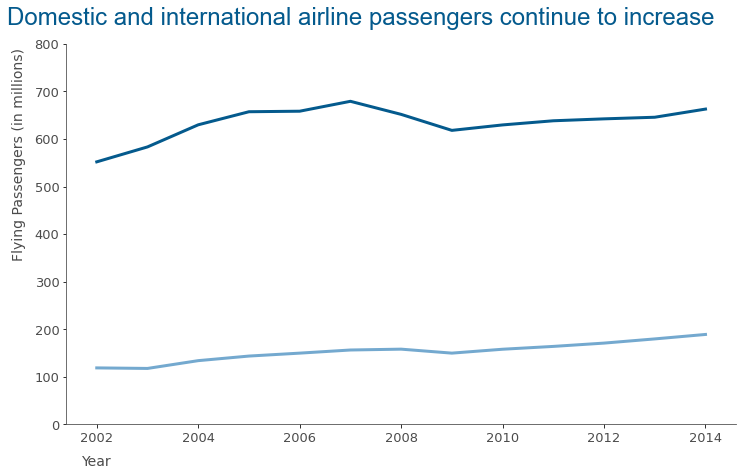

In [45]:
font = {'family': 'Arial',
       'color': '#045a8d',
       'size': 24}

year = air_pass['Year']
domestic = air_pass['DOMESTIC']/1000000
international = air_pass['INTERNATIONAL']/1000000


fig, ax = plt.subplots(figsize = (12,7))


ax.plot(year, domestic, linewidth = 3.0, label='Domestic', color='#045a8d')
ax.plot(year, international, linewidth = 3.0, label='International', color='#74a9cf')

# change y axis starting point
ax.set_ylim(0,800)

# grid
ax.xaxis.grid(False)
ax.yaxis.grid(False)

# set labels
ax.set_title("Domestic and international airline passengers continue to increase", 
             x = -.14, pad = 19, fontdict=font)
ax.set_xlabel('Year', fontsize = 14, color='#4c4c4c')
ax.set_ylabel('Flying Passengers (in millions)', fontsize = 14, color='#4c4c4c')

# set axis label positions
ax.yaxis.set_label_coords(-.06,.71)
ax.xaxis.set_label_coords(.045, -.08)
ax.title.set_position([.44, 1.5])

# legend and ticks
#ax.legend(fontsize=13, ncol=1, loc='upper left', frameon=False)
plt.xticks(fontsize=13, horizontalalignment='center', color='#4c4c4c')
plt.yticks(fontsize=13, color='#4c4c4c')

# remove spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)

# spine color
ax.spines['left'].set_color('#4c4c4c')
ax.spines['bottom'].set_color('#4c4c4c')

# tick line color
for t in ax.xaxis.get_ticklines(): t.set_color('#4c4c4c')
for t in ax.yaxis.get_ticklines(): t.set_color('#4c4c4c')

# add comma to y axis tick values
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

# export
plt.savefig('dom_int_pass_line.svg', format='svg', dpi=300, bbox_inches='tight')

plt.show()

### Percent of Airline Incidents

In [46]:
incidents = np.sum(air['incident_without_fatal_00_14'])
fatal = np.sum(air['fatal_accidents_00_14'])

data = [['Non-Fatal Incidents', incidents], ['Fatal Incidents', fatal]]

accidents = pd.DataFrame(data, columns = ['Type', 'Total'])
accidents

,Type,Total
0,Non-Fatal Incidents,194
1,Fatal Incidents,37


In [47]:
# set up data
labels = accidents['Type']
sizes = accidents['Total']

# colorblind safe colors
colors = ['#74a9cf', '#d0d1e6']

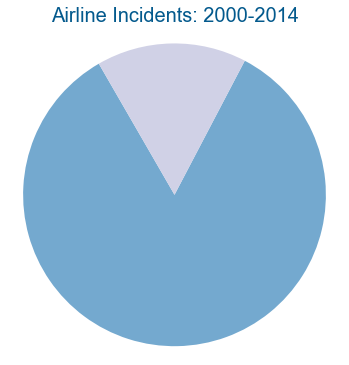

In [48]:
font = {'family': 'Arial',
       'color': '#045a8d',
       'size': 20}

# create figure
fig, ax = plt.subplots(figsize = (6,6))

# create pie chart
ax.pie(sizes, colors = colors, startangle = 120)

# ensures pie is drawn as a circle
ax.axis('equal')

# add title and subtitle
ax.set_title('Airline Incidents: 2000-2014', fontdict=font, pad=10, loc='center')

# set axis label positions

#ax.title.set_position([.4, 0])

plt.savefig('incidents_pie_nolabs.svg', format='svg', dpi=300, bbox_inches='tight')
plt.show()

Resources:

https://www.transtats.bts.gov/Data_Elements.aspx?Data=3

https://github.com/fivethirtyeight/data/tree/master/airline-safety

https://cdan.dot.gov/query

https://www.transtats.bts.gov/Data_Elements.aspx?Data=3

https://www.transtats.bts.gov/Data_Elements.aspx?Data=3